# Create a 3D model of a Permo-Carboniferous Trough (PCT)

Based on a seismic section from the NAGRA report [NAGRA NAB 14-17](https://www.nagra.ch/data/documents/database/dokumente/$default/Default%20Folder/Publikationen/NABs%202004%20-%202015/d_nab14-017.pdf), we extracted interface and orientation points for lithological units and faults.  

The lithological units comprise the permo-carboniferous filling (divided in three stages based on the report results), Mesozoic, Tertiary, and Quaternary strata, as well as the Palaeozoic crystalline basement rocks.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing GemPy
import gempy as gp
from gempy.plot import visualization_2d as vv

# Importing auxilary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# For embedding matplotlib figures
%matplotlib inline

In [2]:
print(f"Code run with GemPy version: {gp.__version__}")

Code run with GemPy version: 2.2.9


# Initialize the model
We start with modelling the trough by generating a gempy model object. This will use interface points and orientations, which we previously stored in a `.csv` file.

In [3]:
np.random.seed(333)
# Import data
# Create a model instance
geo_model = gp.create_model('POC_model')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(geo_model, [0, 28000., 0, 14000., -6500, 1000.], [100, 50, 60],
            path_i = '../data/leu2008/line82_interfaces_wo_middle_MC.csv',
            path_o = '../data/leu2008/line82_foliations_wo_middle_MC.csv');
geo_model.set_topography(source='random', d_z=np.array([300,1000]));

Active grids: ['regular']
Active grids: ['regular' 'topography']


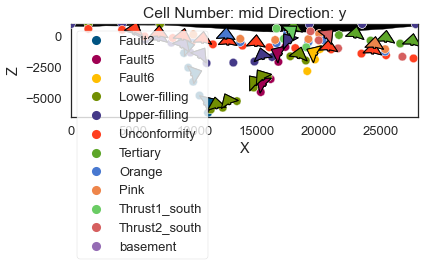

In [4]:
gp.plot_2d(geo_model, show_data=True, show_topography=True);

In [5]:
nx, ny, nz = geo_model.grid.regular_grid.resolution
xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.regular_grid.extent

delx = xmax / nx
dely = ymax / ny

In [6]:
bhole = np.array([[32, 15],
                 [79, 23],
                 [53, 34]])

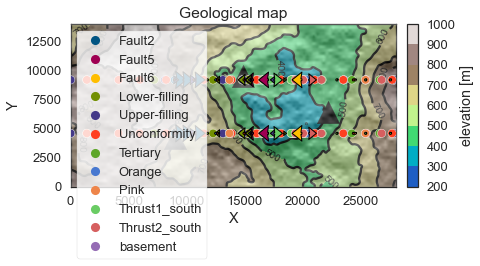

In [7]:
gp.plot_2d(geo_model, show_data=False, show_topography=True, show_values=False, section_names=['topography'],
          show_results=False, show_legend=False)
plt.scatter(bhole[:,0]*delx, bhole[:,1]*dely, s=500, marker='^', facecolor='k')
plt.show()

# Adding information to the model
## Surfaces

In [8]:
col_dict = {'basement': '#c7848f',
           'Lower-filling': '#a5d490', 
           'Upper-filling': '#cfc199',
           'Unconformity': '#725c9a',
           'Orange': '#ff792b',
           'Pink': '#e588f3',
           'Tertiary': '#dbdbac',
           'Fault2': '#015482',
           'Fault5': '#015482',
           'Fault6': '#015482',
           'Thrust1_south': '#5DA629',
           'Thrust2_south': '#5DA629'}
geo_model.surfaces.colors.change_colors(col_dict)
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Fault2,Default series,1,#015482,1
1,Fault5,Default series,2,#015482,2
2,Fault6,Default series,3,#015482,3
3,Lower-filling,Default series,4,#a5d490,4
4,Upper-filling,Default series,5,#cfc199,5
5,Unconformity,Default series,6,#725c9a,6
6,Tertiary,Default series,7,#dbdbac,7
7,Orange,Default series,8,#ff792b,8
8,Pink,Default series,9,#e588f3,9
9,Thrust1_south,Default series,10,#5DA629,10


## Characteristics  
Main features of the model is the asymetric graben system, with the major fault (denoted with **A**), and the graben fill, which is not present beyond the graben shoulders. This, as well as the stop of major faults beneath the mesozoic units (blue units) are important considerations for the modelling process.  
These could be caught, for instance, in likelihood functions if we model the PCT as a Bayesian inference problem.

In [9]:
# Assign formations to series
gp.map_series_to_surfaces(geo_model,
                         {"Thrust1_series": 'Thrust1_south',
                          "Thrust2_series": 'Thrust2_south',
                          "Fault2_series": 'Fault2',
                          "Fault5_series": 'Fault5',
                          "Fault6_series": 'Fault6',
                         "Post_tectonic_series": ('Tertiary', 'Pink', 'Orange'),
                          "Detachement": 'Unconformity',
                         "Syn_tectonic_series2": 'Upper-filling',
                         #"Syn_tectonic_series1": 'Middle-filling',
                         "Pre_tectonic_series": 'Lower-filling'},
                         remove_unused_series=True)
geo_model.surfaces

,surface,series,order_surfaces,color,id
9,Thrust1_south,Thrust1_series,1,#5DA629,1
10,Thrust2_south,Thrust2_series,1,#5DA629,2
0,Fault2,Fault2_series,1,#015482,3
1,Fault5,Fault5_series,1,#015482,4
2,Fault6,Fault6_series,1,#015482,5
6,Tertiary,Post_tectonic_series,1,#dbdbac,6
7,Orange,Post_tectonic_series,2,#ff792b,7
8,Pink,Post_tectonic_series,3,#e588f3,8
5,Unconformity,Detachement,1,#725c9a,9
4,Upper-filling,Syn_tectonic_series2,1,#cfc199,10


In [10]:
# Set Faults
geo_model.set_is_fault(['Thrust1_series', 'Thrust2_series',
                        'Fault2_series', 'Fault5_series', 'Fault6_series'],
                      change_color=False);
#geo_model.set_is_finite_fault(series_fault=['Fault1_series', 'Fault7_series', 'Fault6_series', 
#                                            'Fault5_series', 'Fault3_series', 'Fault4_series'],
#                              toggle=True)

In [11]:
geo_model.set_bottom_relation(series=['Post_tectonic_series', 
                                      'Pre_tectonic_series',
                                      #'Syn_tectonic_series1',
                                      'Syn_tectonic_series2'], bottom_relation='Onlap') #,

,order_series,BottomRelation,isActive,isFault,isFinite
Thrust1_series,1,Fault,True,True,False
Thrust2_series,2,Fault,True,True,False
Fault2_series,3,Fault,True,True,False
Fault5_series,4,Fault,True,True,False
Fault6_series,5,Fault,True,True,False
Post_tectonic_series,6,Onlap,True,False,False
Detachement,7,Erosion,True,False,False
Syn_tectonic_series2,8,Onlap,True,False,False
Pre_tectonic_series,9,Onlap,True,False,False
Basement,10,Erosion,False,False,False


In [12]:
# table of fault relations
geo_model.faults.faults_relations_df

,Thrust1_series,Thrust2_series,Fault2_series,Fault5_series,Fault6_series,Post_tectonic_series,Detachement,Syn_tectonic_series2,Pre_tectonic_series,Basement
Thrust1_series,False,False,False,False,False,True,True,True,True,True
Thrust2_series,False,False,False,False,False,True,True,True,True,True
Fault2_series,False,False,False,False,False,True,True,True,True,True
Fault5_series,False,False,False,False,False,True,True,True,True,True
Fault6_series,False,False,False,False,False,True,True,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False,False,False
Detachement,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series2,False,False,False,False,False,False,False,False,False,False
Pre_tectonic_series,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


In [13]:
fr = np.array([[False, True, False, False, False, True, False, False,   False, False],
               [False, False, False, False, False, True, False, False,  False, False],
               [False, False, False, False, False, False, True, True,  True, True],
               [False, False, False, False, False, False, True, True,  True, True],
               [False, False, False, False, False, False, True, True,  True, True],
               [False, False, False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False, False, False]])
geo_model.set_fault_relation(fr)

,Thrust1_series,Thrust2_series,Fault2_series,Fault5_series,Fault6_series,Post_tectonic_series,Detachement,Syn_tectonic_series2,Pre_tectonic_series,Basement
Thrust1_series,False,True,False,False,False,True,False,False,False,False
Thrust2_series,False,False,False,False,False,True,False,False,False,False
Fault2_series,False,False,False,False,False,False,True,True,True,True
Fault5_series,False,False,False,False,False,False,True,True,True,True
Fault6_series,False,False,False,False,False,False,True,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False,False,False
Detachement,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series2,False,False,False,False,False,False,False,False,False,False
Pre_tectonic_series,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


## Creating the model
Now that we set the parameters and fault relations, it is time to start the modeling process:

In [14]:
# decrease the kriging range
geo_model.modify_kriging_parameters('range', 20000.)
geo_model.modify_kriging_parameters('$C_o$', 2e5)
#geo_model.modify_surface_points('all', smooth=1e-6)

# Set the interpolator function
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[],
                         update_kriging=False);

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  5
Compilation Done!
Kriging values: 
                                          values
range                                     20000
$C_o$                                    200000
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [15]:
# Compute the model
sol = gp.compute_model(geo_model)

In [12]:
geo_model.save_model(name='POC_PCT_model', 
                     path='../models/2021-06-04_POC_base_model')

True

When plotting the scalar field, we actually see what the gradients (the orientation triangles) look like for the different units / faults. 

In [18]:
gp.plot_2d(geo_model, cell_number=25, direction='y', show_data=False, show_topography=False,
          show_lith=True, show_results=True, show_boundaries=True)

In [15]:
gp.plot_2d(geo_model, cell_number=50, direction='z', show_data=False, show_topography=False,
          show_lith=True, show_results=True, show_boundaries=False)

## Simulate Gravity
Using the now generated POC-model, we simulate its gravity at different locations. These locations will be treated as observations later on in the workflow. 
In a first step, we distribute 15 points randomly across the topography of our model. Those will be the station locations, where we pick up the gravity signal of the POC-model.

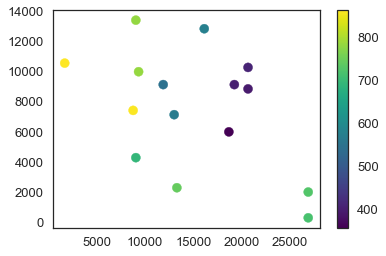

In [17]:
# distribute stations
import random
random.seed(55)
#station_indices = np.random.randint(0, high=4999, size=15)
#station_coordinates = geo_model._grid.topography.values[station_indices, :]

cs = plt.scatter(station_coordinates[:,0], station_coordinates[:,1], c=station_coordinates[:,2], cmap='viridis')
plt.colorbar(cs)

In [16]:
station_coordinates = pd.read_csv('../models/20210319_MC_no_middle_filling/grav_stations_coordinates.csv', sep=';')
station_coordinates = station_coordinates.values

In [18]:
from gempy.assets.geophysics import GravityPreprocessing
geo_model.set_centered_grid(station_coordinates,  resolution = [10, 10, 15], radius=6000)
g = GravityPreprocessing(geo_model.grid.centered_grid)
tz = g.set_tz_kernel()

Active grids: ['regular' 'topography' 'centered']


In [19]:
# add densities - from abdelfettah 2014 and SAPHYR
densities = [0, 0, 0, 0, 0, 2.466, 2.61, 2.53, 
             2.61, 2.47, 2.55, 2.67]
geo_model.add_surface_values(densities, ['density'])

,surface,series,order_surfaces,color,id,density
9,Thrust1_south,Thrust1_series,1,#5DA629,1,0.000000
10,Thrust2_south,Thrust2_series,1,#5DA629,2,0.000000
0,Fault2,Fault2_series,1,#015482,3,0.000000
1,Fault5,Fault5_series,1,#015482,4,0.000000
2,Fault6,Fault6_series,1,#015482,5,0.000000
6,Tertiary,Post_tectonic_series,1,#dbdbac,6,2.466000
8,Pink,Post_tectonic_series,2,#e588f3,7,2.610000
7,Orange,Post_tectonic_series,3,#ff792b,8,2.530000
5,Unconformity,Detachement,1,#725c9a,9,2.610000
4,Upper-filling,Syn_tectonic_series2,1,#cfc199,10,2.470000


In [20]:
geo_model.set_active_grid('centered', reset=True)

Active grids: ['centered']


Grid Object. Values: 
array([[20868.68687   , -4000.        ,   366.1270061 ],
       [20868.68687   , -4000.        ,   294.1270061 ],
       [20868.68687   , -4000.        ,   266.08333051],
       ...,
       [32868.68687   ,  6285.7142857 , -3371.87038815],
       [32868.68687   ,  6285.7142857 , -4824.38546471],
       [32868.68687   ,  6285.7142857 , -6842.6486191 ]])

In [21]:
gp.set_interpolator(geo_model, output=['gravity'], theano_optimizer='fast_run', update_kriging=False)

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  5
Compilation Done!
Kriging values: 
                                          values
range                                     20000
$C_o$                                    200000
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [22]:
sol = gp.compute_model(geo_model)
grav = sol.fw_gravity

In [23]:
grav1 = grav.reshape(len(grav),1)
station_forw_grav = np.append(station_coordinates, grav1, axis=1)

In [24]:
station_forw_grav

array([[26868.68687   ,  2000.        ,   726.1270061 ,  -527.96715536],
       [ 9050.505051  ,  4285.714286  ,   692.7406515 ,  -528.97009269],
       [ 9333.333333  , 10000.        ,   784.86398   ,  -527.98528521],
       [ 9050.505051  , 13428.57143   ,   781.5031029 ,  -529.56000854],
       [ 1696.969697  , 10571.42857   ,   864.151842  ,  -539.25872981],
       [ 8767.676768  ,  7428.571429  ,   860.9562568 ,  -530.03343602],
       [20646.46465   ,  8857.142857  ,   393.7435602 ,  -533.1485896 ],
       [18666.66667   ,  6000.        ,   357.7654099 ,  -530.19314273],
       [16121.21212   , 12857.14286   ,   575.5261508 ,  -526.49859155],
       [13292.92929   ,  2285.714286  ,   745.0047716 ,  -522.89242442],
       [11878.78788   ,  9142.857143  ,   546.3214328 ,  -522.58721612],
       [20646.46465   , 10285.71429   ,   408.4192148 ,  -533.3120763 ],
       [19232.32323   ,  9142.857143  ,   402.8604494 ,  -531.72536106],
       [13010.10101   ,  7142.857143  ,   567.88082

In [25]:
df_stat = pd.DataFrame(station_forw_grav, columns=["X", "Y", "Z", "grav"])

In [26]:
df_stat[['X','Y','Z']] = np.around(df_stat[['X','Y','Z']], 2)

In [27]:
df_stat

,X,Y,Z,grav
0,26868.69,2000.00,726.13,-527.967155
1,9050.51,4285.71,692.74,-528.970093
2,9333.33,10000.00,784.86,-527.985285
3,9050.51,13428.57,781.50,-529.560009
4,1696.97,10571.43,864.15,-539.258730
5,8767.68,7428.57,860.96,-530.033436
6,20646.46,8857.14,393.74,-533.148590
7,18666.67,6000.00,357.77,-530.193143
8,16121.21,12857.14,575.53,-526.498592
9,13292.93,2285.71,745.00,-522.892424


In [28]:
df_stat.to_csv('../models/20210319_MC_no_middle_filling/2021-06-16_grav_of_POC_base_model.csv', index=False)